In [1]:
# A study on 2-layered network for MNIST dataset. The idea is to explore 
# the effect of the number of hidden neurons on performance.

import keras
from keras import layers
from keras import models
import numpy as np
import time
from matplotlib import pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical

# load mnist data 
(data_train, labels_train), (data_test, labels_test) = mnist.load_data()
print("data_train-size=", data_train.shape)
print("data_test-size=", data_test.shape)

train_images = np.reshape(data_train, (60000,28*28))
test_images = np.reshape(data_test, (10000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

print("train_images-size=", train_images.shape)
print("test_images-size=", test_images.shape)

train_image_labels =  to_categorical(labels_train)
test_image_labels =  to_categorical(labels_test)

print("train_images_labels=", train_image_labels.shape)
print("test_images_labels=", test_image_labels.shape)

Using TensorFlow backend.


data_train-size= (60000, 28, 28)
data_test-size= (10000, 28, 28)
train_images-size= (60000, 784)
test_images-size= (10000, 784)
train_images_labels= (60000, 10)
test_images_labels= (10000, 10)


In [2]:
hidden_units_list = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
execution_time = []
accuracies = []
losses = []
EPOCHS = 5

for units in hidden_units_list:
    start_time = time.time()
    model = models.Sequential()
    model.add(layers.Dense(units, activation = 'relu', input_shape=(784,) ))
    model.add(layers.Dense(units, activation = 'relu' ))
    model.add(layers.Dense(10, activation = 'softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
    model.fit(train_images, train_image_labels, epochs=EPOCHS)
    test_loss, test_acc = model.evaluate(test_images, test_image_labels)
    stop_time = time.time()
    average_execution_time = (stop_time - start_time)/EPOCHS
    execution_time.append(average_execution_time)
    accuracies.append(test_acc)
    losses.append(test_loss)
    print ("units=", units, ", test_loss=", test_loss, ", test_acc=", test_acc, ", average-time=", average_execution_time )        

Epoch 1/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.4366 - acc: 0.8758
Epoch 2/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.2315 - acc: 0.9335
Epoch 3/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.1998 - acc: 0.9428
Epoch 4/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.1826 - acc: 0.9482
Epoch 5/5
10000/10000 [==============================] - 0s 11us/step
units= 16 , test_loss= 0.18653055982105435 , test_acc= 0.9477 , average-time= 1.4039999961853027
Epoch 1/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.3310 - acc: 0.9041
Epoch 2/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.1753 - acc: 0.9489
Epoch 3/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.1414 - acc: 0.9582
Epoch 4/5
60000/60000 [==============================] - 1s 25us/step - loss: 0.1229 - acc: 0.9635
Epoch 5/5
10000/10000 [==================

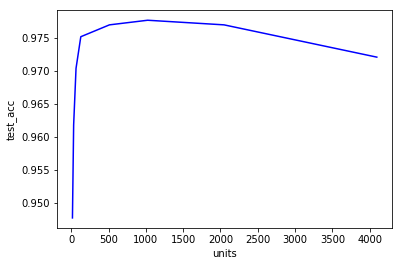

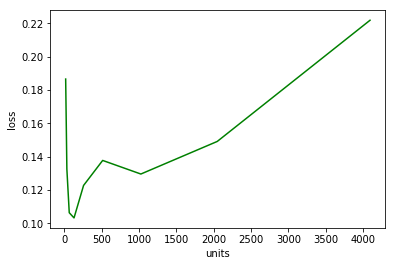

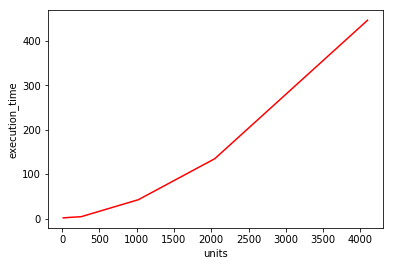

In [3]:
plt.plot(hidden_units_list, accuracies, 'b')
plt.xlabel("units")
plt.ylabel("test_acc")
plt.show()

plt.plot(hidden_units_list, losses, 'g')
plt.xlabel("units")
plt.ylabel("loss")
plt.show()

plt.plot(hidden_units_list, execution_time, 'r')
plt.xlabel("units")
plt.ylabel("execution_time")

plt.show()